In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,RobustScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

Reading data from csv

In [3]:
data = pd.read_csv("C:\\Users\\manish singh\\OneDrive\\Desktop\\project ML\\cardio_data_processed.csv")

In [4]:
df=data.copy()
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category,bp_category_encoded
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1,Hypertension Stage 1
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2,Hypertension Stage 2
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1,Hypertension Stage 1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2,Hypertension Stage 2
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal,Normal


Data preprocessing 

In [5]:
df.shape

(68205, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68205 entries, 0 to 68204
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   68205 non-null  int64  
 1   age                  68205 non-null  int64  
 2   gender               68205 non-null  int64  
 3   height               68205 non-null  int64  
 4   weight               68205 non-null  float64
 5   ap_hi                68205 non-null  int64  
 6   ap_lo                68205 non-null  int64  
 7   cholesterol          68205 non-null  int64  
 8   gluc                 68205 non-null  int64  
 9   smoke                68205 non-null  int64  
 10  alco                 68205 non-null  int64  
 11  active               68205 non-null  int64  
 12  cardio               68205 non-null  int64  
 13  age_years            68205 non-null  int64  
 14  bmi                  68205 non-null  float64
 15  bp_category          68205 non-null 

In [7]:
df.isnull().sum()

id                     0
age                    0
gender                 0
height                 0
weight                 0
ap_hi                  0
ap_lo                  0
cholesterol            0
gluc                   0
smoke                  0
alco                   0
active                 0
cardio                 0
age_years              0
bmi                    0
bp_category            0
bp_category_encoded    0
dtype: int64

In [8]:
df.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi
count,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000,68205.000000
mean,49972.410498,19462.667737,1.348625,164.372861,74.100688,126.434924,81.263925,1.363243,1.225174,0.087662,0.053134,0.803548,0.493688,52.823635,27.510513
std,28852.138290,2468.381854,0.476539,8.176756,14.288862,15.961685,9.143985,0.678080,0.571288,0.282805,0.224302,0.397317,0.499964,6.769909,6.026497
min,0.000000,10798.000000,1.000000,55.000000,11.000000,90.000000,60.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,29.000000,3.471784
25%,24991.000000,17656.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,48.000000,23.875115
50%,50008.000000,19700.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,53.000000,26.346494
75%,74878.000000,21323.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,58.000000,30.116213
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,180.000000,120.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,64.000000,298.666667


In [9]:
df.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'age_years',
       'bmi', 'bp_category', 'bp_category_encoded'],
      dtype='object')

In [10]:
cols_to_remove=['id','age','bp_category_encoded']
df.drop(cols_to_remove,axis=1,inplace=True)
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


<Axes: xlabel='cardio', ylabel='count'>

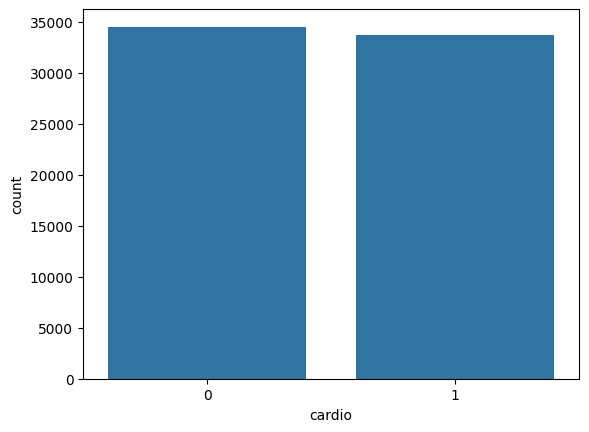

In [11]:
sns.countplot(df,x='cardio')

In [12]:
df['cardio'].value_counts()

cardio
0    34533
1    33672
Name: count, dtype: int64

In [13]:
categorical=['gender','cardio','bp_category','active'
       'cholesterol', 'gluc', 'smoke', 'alco',]

numerical=[col for col in df.columns if col not in categorical]       

In [14]:
corr=df[numerical].corr()

<Axes: >

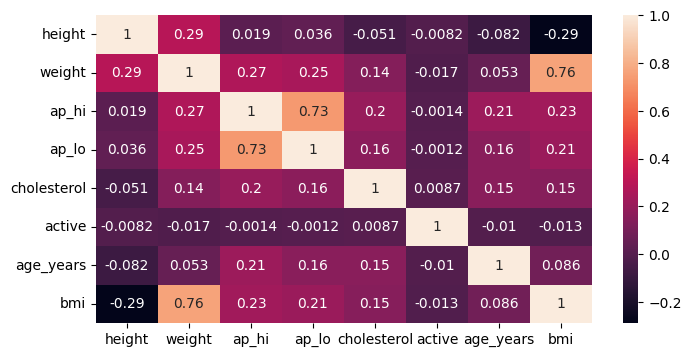

In [15]:
plt.figure(figsize=(8,4))
sns.heatmap(corr,annot=True)

columns Distribution and outliers

In [16]:
list[numerical]

list[['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'active', 'age_years', 'bmi']]

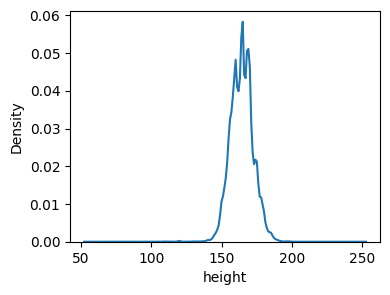

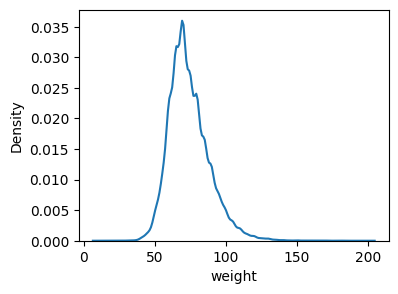

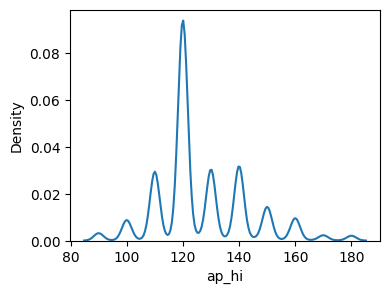

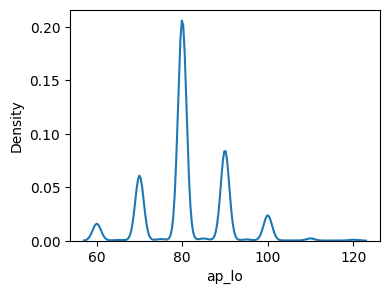

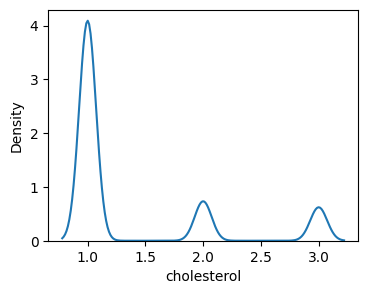

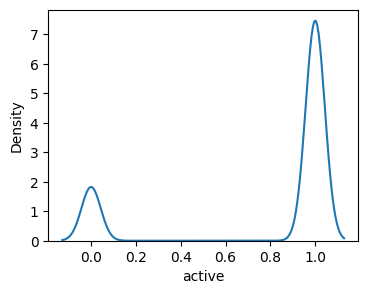

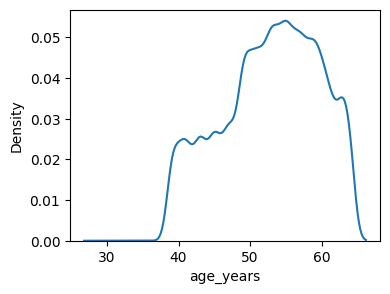

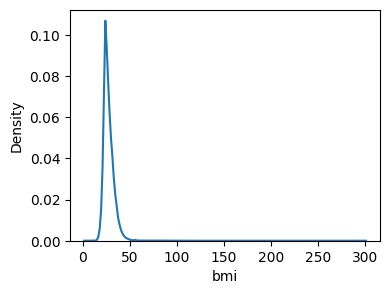

In [17]:
for col in numerical:
    plt.figure(figsize=(4,3))
    sns.kdeplot(df[col])

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


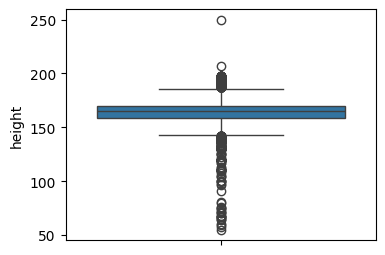

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


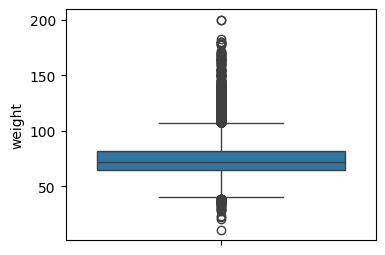

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


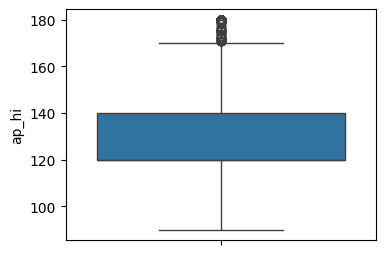

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


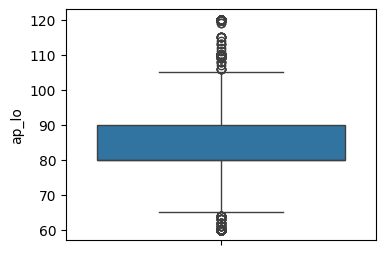

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


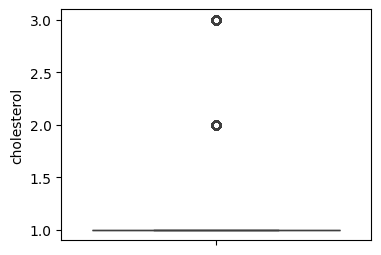

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


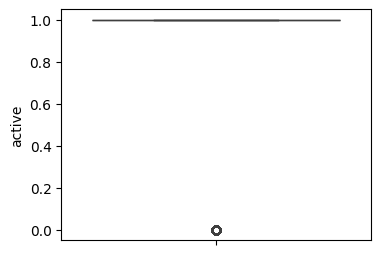

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


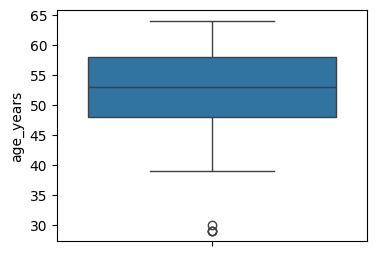

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


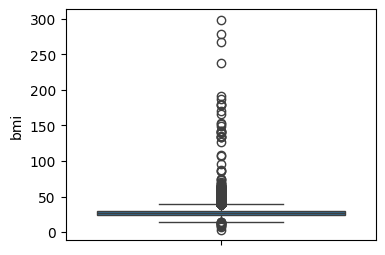

In [18]:
for col in numerical:
    plt.figure(figsize=(4,3))
    sns.boxplot(df[col])
    plt.show()

C:\Users\manish singh\AppData\Roaming\Python\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


<Axes: ylabel='height'>

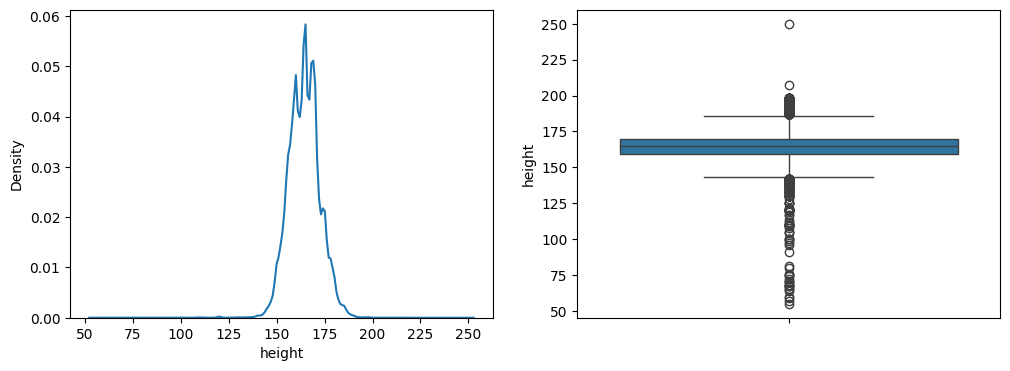

In [19]:
fig,axs=plt.subplots(1,2)
fig.set_figheight(4)
fig.set_figwidth(12)
sns.kdeplot(df['height'],ax=axs[0])
sns.boxplot(df['height'],ax=axs[1])


In [20]:
df.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,age_years,bmi,bp_category
0,2,168,62.0,110,80,1,1,0,0,1,0,50,21.967120,Hypertension Stage 1
1,1,156,85.0,140,90,3,1,0,0,1,1,55,34.927679,Hypertension Stage 2
2,1,165,64.0,130,70,3,1,0,0,0,1,51,23.507805,Hypertension Stage 1
3,2,169,82.0,150,100,1,1,0,0,1,1,48,28.710479,Hypertension Stage 2
4,1,156,56.0,100,60,1,1,0,0,0,0,47,23.011177,Normal


splitting the data

In [21]:
X=df.drop('cardio',axis=1)
y=df['cardio']

In [22]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75)

In [23]:
X_train.head()

,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,age_years,bmi,bp_category
23419,1,154,73.0,110,70,1,1,0,0,1,43,30.780907,Normal
4280,1,156,60.0,120,80,1,1,0,0,1,50,24.654832,Hypertension Stage 1
6312,1,172,74.0,120,80,1,1,0,0,0,52,25.013521,Hypertension Stage 1
1229,1,170,63.0,120,80,1,1,0,0,1,41,21.799308,Hypertension Stage 1
4266,1,162,71.0,110,70,1,1,0,0,1,41,27.053803,Normal


Scaling the numerical columns

In [24]:
list[numerical]

list[['height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'active', 'age_years', 'bmi']]

In [25]:
ct=ColumnTransformer(transformers=[('robsc',RobustScaler(),numerical),
('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),['bp_category'])],
remainder='passthrough')

In [26]:
X_train_transformerd=ct.fit_transform(X_train)

In [27]:
X_train_transformerd

array([[-1.        ,  0.05882353, -0.5       , ...,  1.        ,
         0.        ,  0.        ],
       [-0.81818182, -0.70588235,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [ 0.63636364,  0.11764706,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [ 0.45454545,  0.47058824,  0.        , ...,  1.        ,
         0.        ,  0.        ],
       [-0.63636364,  0.41176471,  2.5       , ...,  1.        ,
         0.        ,  0.        ],
       [-1.27272727, -0.58823529,  0.5       , ...,  1.        ,
         0.        ,  0.        ]])

In [28]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__cholesterol', 'robsc__active', 'robsc__age_years',
       'robsc__bmi', 'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__gluc', 'remainder__smoke',
       'remainder__alco'], dtype=object)

In [29]:
pd.DataFrame(data=X_train_transformerd,columns=ct.get_feature_names_out())

,robsc__height,robsc__weight,robsc__ap_hi,robsc__ap_lo,robsc__cholesterol,robsc__active,robsc__age_years,robsc__bmi,ohe__bp_category_Hypertension Stage 1,ohe__bp_category_Hypertension Stage 2,ohe__bp_category_Normal,remainder__gender,remainder__gluc,remainder__smoke,remainder__alco
0,-1.000000,0.058824,-0.5,-1.0,0.0,0.0,-1.0,0.710158,0.0,0.0,1.0,1.0,1.0,0.0,0.0
1,-0.818182,-0.705882,0.0,0.0,0.0,0.0,-0.3,-0.270915,1.0,0.0,0.0,1.0,1.0,0.0,0.0
2,0.636364,0.117647,0.0,0.0,0.0,-1.0,-0.1,-0.213472,1.0,0.0,0.0,1.0,1.0,0.0,0.0
3,0.454545,-0.529412,0.0,0.0,0.0,0.0,-1.2,-0.728218,1.0,0.0,0.0,1.0,1.0,0.0,0.0
4,-0.272727,-0.058824,-0.5,-1.0,0.0,0.0,-1.2,0.113273,0.0,0.0,1.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51148,0.090909,-0.411765,0.0,0.0,0.0,0.0,0.5,-0.441712,1.0,0.0,0.0,1.0,1.0,0.0,0.0
51149,-1.363636,1.294118,-1.5,-2.0,0.0,-1.0,0.3,2.471275,0.0,0.0,1.0,1.0,1.0,0.0,0.0
51150,0.454545,0.470588,0.0,0.0,0.0,0.0,-0.7,0.213823,1.0,0.0,0.0,2.0,1.0,0.0,0.0
51151,-0.636364,0.411765,2.5,1.0,0.0,0.0,0.9,0.848631,0.0,1.0,0.0,1.0,1.0,0.0,0.0


In [30]:
X_test_transformerd=ct.transform(X_test)

In [31]:
X_train_transformerd.shape

(51153, 15)

In [32]:
ct.get_feature_names_out()

array(['robsc__height', 'robsc__weight', 'robsc__ap_hi', 'robsc__ap_lo',
       'robsc__cholesterol', 'robsc__active', 'robsc__age_years',
       'robsc__bmi', 'ohe__bp_category_Hypertension Stage 1',
       'ohe__bp_category_Hypertension Stage 2', 'ohe__bp_category_Normal',
       'remainder__gender', 'remainder__gluc', 'remainder__smoke',
       'remainder__alco'], dtype=object)

In [33]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

Training the model
* Decision Tree Classifier
* Random Forest
* Xgbosst

In [34]:
from sklearn.metrics import accuracy_score,precision_score,recall_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV

Decision Tree Classifier

In [35]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train_transformerd,y_train)
pred=dt.predict(X_test_transformerd)

In [36]:
pred

array([0, 1, 1, ..., 0, 1, 0], dtype=int64)

In [37]:
accuracy=accuracy_score(y_test,pred)
recall=recall_score(y_test,pred)
cm=confusion_matrix(y_test,pred)

In [38]:
print(accuracy)
print(recall)


0.6444991789819376
0.6254619144117296


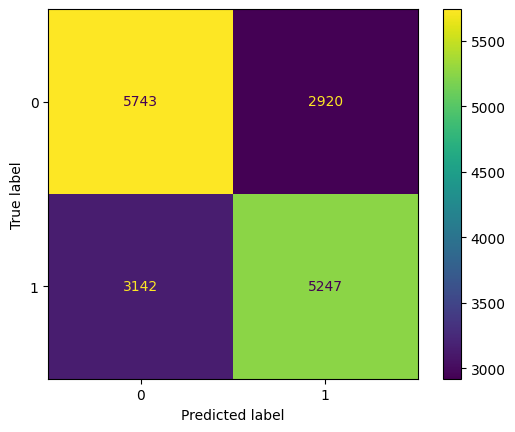

In [39]:
ConfusionMatrixDisplay(cm).plot()

In [40]:
dt2= DecisionTreeClassifier(max_depth=7,criterion='entropy')
dt2.fit(X_train_transformerd,y_train)
pred2=dt2.predict(X_test_transformerd)

In [41]:
pred2

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [42]:
accuracy2=accuracy_score(y_test,pred2)
recall2=recall_score(y_test,pred2)
cm2=confusion_matrix(y_test,pred2)

In [43]:
print(accuracy2)
print(recall2)

0.7307060755336617
0.6657527714864704


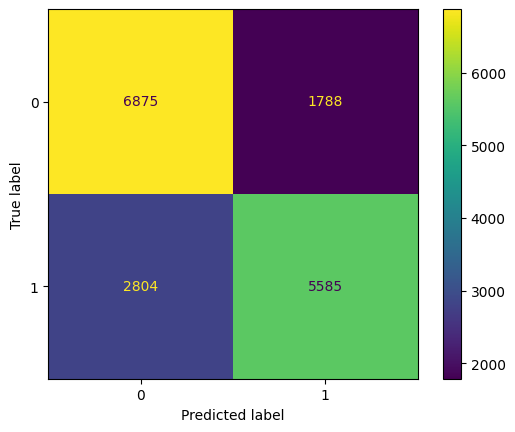

In [44]:
ConfusionMatrixDisplay(cm2).plot()

Hyper parameter tuning

In [45]:
dt.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

In [46]:

 param_dict={'criterion': ['gini','entropy'],
 'max_depth': [5,6,7],
 'max_features': [7,8,9,10,12,15],
 'min_samples_split': [8,10,12],}

 randomcv=RandomizedSearchCV(dt,param_distributions=param_dict)
 randomcv.fit(X_train_transformerd,y_train)


RandomizedSearchCV(estimator=DecisionTreeClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 6, 7],
                                        'max_features': [7, 8, 9, 10, 12, 15],
                                        'min_samples_split': [8, 10, 12]})

In [47]:
cv_pred=randomcv.predict(X_test_transformerd)
cv_acc=accuracy_score(cv_pred,y_test)
print(cv_acc)

0.7311165845648604


In [66]:

cv_rec=recall_score(cv_pred,y_test)
print(cv_rec)

0.7559892328398385


In [49]:
best_dt=randomcv.best_estimator_

In [50]:
best_dt.fit(X_train_transformerd,y_train)
best_pred=best_dt.predict(X_test_transformerd)
acc=accuracy_score(best_pred,y_test)
recal=recall_score(best_pred,y_test)
cm=confusion_matrix(best_pred,y_test)

0.7299437016185785
0.6254619144117296


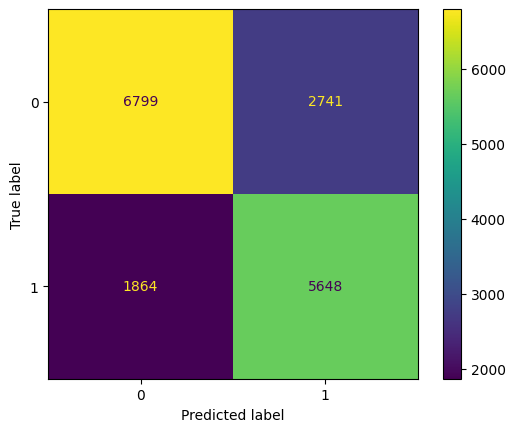

In [51]:
print(acc)
print(recall)
ConfusionMatrixDisplay(cm).plot()

In [52]:
X_train.columns

Index(['gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc',
       'smoke', 'alco', 'active', 'age_years', 'bmi', 'bp_category'],
      dtype='object')

In [53]:
gender = int(input('M/F').lower())
height = int(input('height in cms'))
weight = int(input('weight in kg'))
ap_hi = int(input('ap_hi'))
ap_lo = int(input('ap_lo'))
cholesterol = int(input('cholesterol: Normal,Above Normal,Well Above Normal').lower())
gluc = int(input('Gluc:Normal,Above Normal,Well Above Normal').lower())
smoke = int(input('Smoker or Non Smoker').lower())
alco = int(input('Alco: Yes/No').lower())
activate = int(input('Active: Yes/No').lower())
age = int(input('Age in years'))
bmi = float(input('Bmi'))
bp_cat = input('Bp Category:"Normal","Elevate","Hypertension stage 1","Hypertension stage 2", and "Hypertension crisis"  ')


#gender
#if gender=='m':
#    gen = 2
#else:
#    gen = 1

In [54]:
userinput_num=[gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,activate,age,bmi]
userinput_cat=[bp_cat]

In [55]:
arrayinput_num=np.array(userinput_num).reshape(1,-1)
arrayinput_cat=np.array(userinput_cat).reshape(1,-1)

In [56]:
ct=ColumnTransformer(transformers=[('robsc',RobustScaler(),arrayinput_num),
('ohe',OneHotEncoder(drop='first',handle_unknown='ignore'),arrayinput_cat)],
remainder='passthrough')

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
rfc= RandomForestClassifier()

In [59]:
rfc.fit(X_train_transformerd,y_train)
pred=rfc.predict(X_test_transformerd)

acc=accuracy_score(y_test,pred)
rec=recall_score(y_test,pred)

cm= confusion_matrix(y_test,pred)

In [60]:
print(rec)
print(acc)

0.6941232566456074
0.7122331691297209


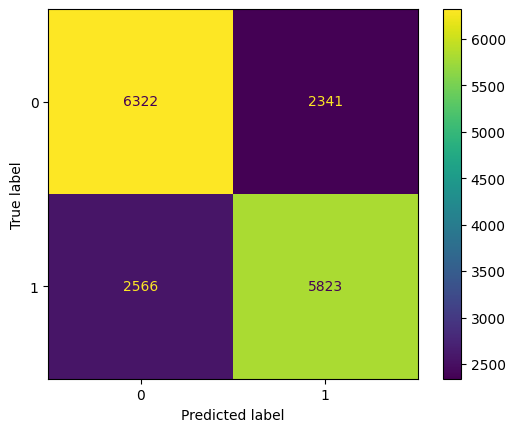

In [61]:
ConfusionMatrixDisplay(cm).plot()

In [62]:
rfc.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [63]:
params={
 'criterion': ['gini','entropy'],
 'max_depth': [5,7,9,10,12,13],
 'min_samples_split': [5,7,8,10,12,15],
 'n_estimators': [50,100,120,150,170,200],
 }

In [64]:
randomised_cv= RandomizedSearchCV(param_distributions=params,estimator=rfc)
randomised_cv.fit(X_train_transformerd,y_train)

RandomizedSearchCV(estimator=RandomForestClassifier(),
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 7, 9, 10, 12, 13],
                                        'min_samples_split': [5, 7, 8, 10, 12,
                                                              15],
                                        'n_estimators': [50, 100, 120, 150, 170,
                                                         200]})

In [67]:
cv_pred1=randomised_cv.predict(X_test_transformerd)
cv_acc1=accuracy_score(cv_pred,y_test)
print(cv_acc1)

0.7311165845648604


In [68]:
cv_rec1=recall_score(cv_pred,y_test)
print(cv_rec1)

0.7559892328398385


In [70]:
randomised_cv.best_params_

{'n_estimators': 170,
 'min_samples_split': 10,
 'max_depth': 13,
 'criterion': 'entropy'}

In [71]:
best_rfc=randomised_cv.best_estimator_

In [72]:
best_rfc.fit(X_train_transformerd,y_train)
best_pred=best_dt.predict(X_test_transformerd)
acc=accuracy_score(best_pred,y_test)
rec=recall_score(best_pred,y_test)
cm=confusion_matrix(best_pred,y_test)

0.7299437016185785
0.6254619144117296


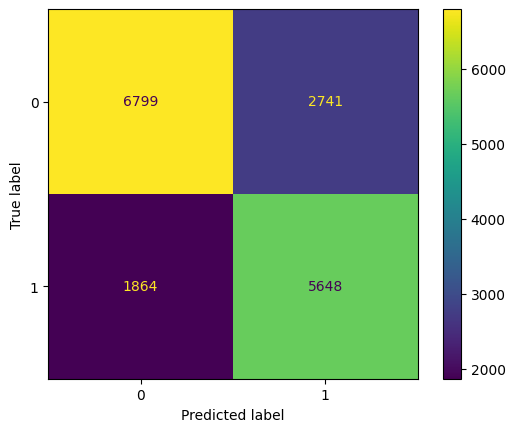

In [73]:
print(acc)
print(recall)
ConfusionMatrixDisplay(cm).plot()

In [74]:
best_rfc

RandomForestClassifier(criterion='entropy', max_depth=13, min_samples_split=10,
                       n_estimators=170)